![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [1]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [2]:
# Tails
crimes.tail()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
185710,231510379,2023-05-29,2023-05-25,1100,N Hollywood,"BUNCO, GRAND THEFT",25,M,W,NaN,Invest Cont,5300 DENNY AV
185711,231604807,2023-01-27,2023-01-26,1800,Foothill,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,M,H,NaN,Invest Cont,12500 BRANFORD ST
185712,231606525,2023-03-22,2023-03-22,1000,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,12800 FILMORE ST
185713,231210064,2023-04-12,2023-04-12,1630,77th Street,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,6100 S VERMONT AV
185714,230906458,2023-03-05,2023-03-05,0900,Van Nuys,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,NaN,Invest Cont,14500 HARTLAND ST


In [3]:
# Info
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   DR_NO         185715 non-null  int64 
 1   Date Rptd     185715 non-null  object
 2   DATE OCC      185715 non-null  object
 3   TIME OCC      185715 non-null  object
 4   AREA NAME     185715 non-null  object
 5   Crm Cd Desc   185715 non-null  object
 6   Vict Age      185715 non-null  int64 
 7   Vict Sex      185704 non-null  object
 8   Vict Descent  185705 non-null  object
 9   Weapon Desc   73502 non-null   object
 10  Status Desc   185715 non-null  object
 11  LOCATION      185715 non-null  object
dtypes: int64(2), object(10)
memory usage: 17.0+ MB


In [4]:
# Statistics
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


In [5]:
#Missing values
crimes.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA NAME            0
Crm Cd Desc          0
Vict Age             0
Vict Sex            11
Vict Descent        10
Weapon Desc     112213
Status Desc          0
LOCATION             0
dtype: int64

In [6]:
#Missing_values_proportion
missing_values_prop = len(crimes) * 0.05
print(missing_values_prop)

9285.75


In [7]:
#Handling missing value
df = crimes.dropna()
print(df.isna().sum())

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA NAME       0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Weapon Desc     0
Status Desc     0
LOCATION        0
dtype: int64


/tmp/ipykernel_12006/2084504345.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR OCC"] = df["TIME OCC"].str[:2].astype(int)


        DR_NO   Date Rptd    DATE OCC TIME OCC    AREA NAME  \
9   231506571  2023-03-03  2020-07-15     1700  N Hollywood   
20  221216517  2022-07-14  2020-01-01     1200  77th Street   
26  222017787  2022-11-30  2020-01-01     1200      Olympic   
35  220313293  2022-07-06  2020-06-30     1400    Southwest   
44  221213066  2022-06-03  2020-12-01     1400  77th Street   

                                  Crm Cd Desc  Vict Age Vict Sex Vict Descent  \
9                   OTHER MISCELLANEOUS CRIME        21        F            W   
20  HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE        22        F            B   
26                            ORAL COPULATION        12        F            H   
35          INTIMATE PARTNER - SIMPLE ASSAULT        25        F            B   
44                                TRESPASSING        34        F            B   

                                       Weapon Desc  Status Desc  \
9                                    VERBAL THREAT  Invest Cont   


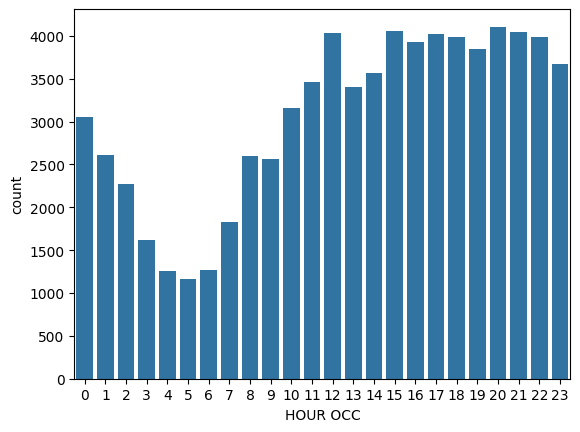

In [8]:
#Question 1 :HOW OFTEN CRIMES IS THE HIGH MOST

#Extract hours
df["HOUR OCC"] = df["TIME OCC"].str[:2].astype(int)
print(df.head())

#Plot frenquences
sns.countplot(x="HOUR OCC", data =df)
plt.show()

#Saving hour as variable
peak_crimee_hour = 20

In [9]:
# Question 2 :AREA PRESENTED HOW OFTEN CRIMES NIGHT

# Convert "TIME OCC" to integer
df["TIME OCC"] = df["TIME OCC"].astype(int)

# Extract hour only
df["HOUR OCC"] = df["TIME OCC"] // 100

# Subset for hours night
data = df[df["HOUR OCC"].isin([22, 23, 0 ,1 ,2 ,3])]

# Count area by criminality
crime_counts = data.groupby("AREA NAME")["HOUR OCC"].count().reset_index()

# Sorted
crime_counts = crime_counts.sort_values("HOUR OCC", ascending=False)

# Extract area with crime high most
peak_night_crime_location = crime_counts.iloc[0]["AREA NAME"]

# Print
print("PEAK_NIGHT_CRIME_LOCATION : ", peak_night_crime_location)

PEAK_NIGHT_CRIME_LOCATION :  Central


/tmp/ipykernel_12006/345019873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TIME OCC"] = df["TIME OCC"].astype(int)
/tmp/ipykernel_12006/345019873.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOUR OCC"] = df["TIME OCC"] // 100


In [10]:
#Question 3 : IDENTIFY CRIMES COMMIT AGAINST VICTIMS AGE GROUP

#Create bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf] # np.inf to include all superior values

#Define labels
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

#Apply pd.cut function
df["Age Bracket"] = pd.cut(df["Vict Age"], bins=age_bins, labels=age_labels, right=True)

#Print head
print(df[["Vict Age", "Age Bracket"]].head())

#Count Crime by Age Group victims
victim_ages = df["Age Bracket"].value_counts()
print("\nNumber of crimes commit against victims age group : ", victim_ages)

    Vict Age Age Bracket
9         21       18-25
20        22       18-25
26        12        0-17
35        25       18-25
44        34       26-34

Number of crimes commit against victims age group :  Age Bracket
26-34    18539
35-44    16037
18-25    12256
45-54    10808
55-64     7585
65+       4503
0-17      3770
Name: count, dtype: int64


/tmp/ipykernel_12006/3532299811.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age Bracket"] = pd.cut(df["Vict Age"], bins=age_bins, labels=age_labels, right=True)
